# REGULAR EXPRESSIONS
https://regex101.com/

They allow you to specify a **pattern** of text to search for.  

* Email addresses have @ symbols in the middle
* US social security numbers have nine digits and two hyphens
* website URLs often have periods and forward slashes
* News headlines use title case
* Social media hashtags begin with # and contain no spaces, and more.


**Regular expressions are huge time-savers, not just for software users but also for programmers.**


## Finding Patterns of Text Without Regular Expressions

Say you want to find an American phone number in a string. You know the pattern if you’re American: three numbers, a hyphen, three numbers, a hyphen, and four numbers. Here’s an example: 415-555-4242.

Let's write a function that helps us recognize a phone number.

In [1]:
def isPhoneNumber(text):
    
    if len(text) != 12:
        return False
        
    for i in range(0,3):

        if not text[i].isdecimal():
            return False
    
    if text[3] != '-':
        return False

    for i in range(4,7):

        if not text[i].isdecimal():
            return False

    if text[7] != '-':
        return False

    for i in range(8,12):

        if not text[i].isdecimal():
            return False
    else:
        return True

    
    

In [6]:
text = '333-555-4955'

isPhoneNumber(text)

True

In [7]:
text = '5333-555-4955'

isPhoneNumber(text)

False

In [8]:
text = 'omg-god-what'

isPhoneNumber(text)

False

**If you wanted to find a phone number within a larger string, you would have to add even more code to find the phone number pattern.**

So it really took us a lot of effort to check whether a list of character in a string is a phone number or not.
With regulra expressions we can simplify this process really easly.

In [13]:
message = 'Call me at 415-555-1011 tomorrow. 415-555-9999 is my office.'

for i in range(len(message)):

    chunck = message[i:i+12]

    if isPhoneNumber(chunck):   # we don't have to put equals True as it is by default!!!
        print(f'Phone number found: {chunck}')

Phone number found: 415-555-1011
Phone number found: 415-555-9999


While the string in message is short in this example, it could be millions of characters long and the program would still run in less than a second. A similar program that finds phone numbers using **regular expressions would also run in less than a second, but regular expressions make it quicker to write these programs.**

In [14]:
message = 'Call me at 415-555-1011 tomorrow. 415-555-9999 is my office.'


''' I cannot iterate like this as in this situation i is a character and not a number and io canno't 
    add 12 to it.
'''
for i in message:

    chunck = message[i:i+12]

    if isPhoneNumber(chunck):   # we don't have to put equals True as it is by default!!!
        print(f'Phone number found: {chunck}')

TypeError: can only concatenate str (not "int") to str

## Finding Patterns of Text with Regular Expressions

The previous phone number–finding program works, but it uses a lot of code to do something limited: the isPhoneNumber() function is 17 lines but can find only one pattern of phone numbers. What about a phone number formatted like 415.555.4242 or (415) 555-4242? What if the phone number had an extension, like 415-555-4242 x99?

In General it is better to have those patterns quite elastic in order to accomodate any future changes and specific situations. A function like the one from before is not the best way to achieve that 

**Regular expressions are descriptions for a pattern of text.**

 For example, a \d in a regex stands for a digit character—that is, any single numeral from 0 to 9. 
 
 * *\d\d\d-\d\d\d-\d\d\d\d* mathces the pattern from the previous isPhoneNumber() function did
 * *\d{3}-\d{3}-\d{4}* also matches the correct phone number format.

### Creating Regex Objects

All the regex functions in Python are in the **re module**. But we can use a site like regex101 to write directly the regular expression into python

Passing a string value representing your regular expression to re.compile() **returns a Regex pattern object (or simply, a Regex object).**

In [16]:
import re

In [18]:
phoneMuberRegex = re.compile(r'\d\d\d-\d\d\d-\d\d\d\d')

# Now the phoneNumRegex variable contains a Regex object

### Matching Regex Objects

A Regex object’s **search() METHOD** searches the string it is passed for any matches to the regex. The **search() METHOD** will return **None** if the regex pattern is not found in the string. If the pattern is found, the **search() METHOD** returns a **Match object**, which have a **group() METHOD** that will return the actual matched text from the searched string. 

In [21]:
phoneMuberRegex = re.compile(r'\d\d\d-\d\d\d-\d\d\d\d')


# The mo variable name is just a generic name to use for Match objects.
mo = phoneMuberRegex.search('My number is 415-555-4242.')

print(f'Phone number found: {mo.group()}')


Phone number found: 415-555-4242


1. **Pass our desired pattern to re.compile()** and store the resulting Regex object in phoneNumRegex. 
2. **Call search()** on phoneNumRegex **and pass search() the string we want to match** for during the search
3. **The result of the search gets stored in the variable mo**. 
4. Knowing that mo contains a Match object and not the null value None, **we can call group()** on mo to return the match.
5. Writing mo.group() inside our print() function call displays the whole match, 415-555-4242.

### Review of Regular Expression Matching

1. Import the regex module with import re.
2. Create a Regex object with the re.compile() function. (Remember to use a raw string.)
3. Pass the string you want to search into the Regex object’s search() method. This returns a Match object.
4. Call the Match object’s group() method to return a string of the actual matched text.

## Pattern Matching with Regular Expressions
### Grouping with parentheses

Say you want to separate the area code from the rest of the phone number. Adding parentheses will create groups in the regex: **(\d\d\d)-(\d\d\d-\d\d\d\d).** Then you can use the group() match object method to grab the matching text from just one group.

* The **first** set of parentheses will be group 1 -> **(\d\d\d)**
* The **second** set of parentheses will be group 2 -> **(\d\d\d- \d\d\d\d)**

 By passing the integer 1 or 2 to the group() match object method, you can grab different parts of the matched text.

In [33]:
phoneMuberRegex = re.compile(r'(\d\d\d)-(\d\d\d-\d\d\d\d)')


# The mo variable name is just a generic name to use for Match objects.
mo = phoneMuberRegex.search('My number is 415-555-4242')

In [35]:
mo.group(1) # gives the first group

'415'

In [36]:
mo.group(2) # gives the second group

'555-4242'

In [38]:
mo.group() # gives all the expression

'415-555-4242'

In [39]:
mo.group(0) # gives all the expression

'415-555-4242'

If you would like to retrieve all the groups at once, use the **groups() METHOD** (NOTE: the plural form for the name.)

Since mo.groups() returns a tuple of multiple values, y**ou can use the multiple-assignment trick to assign each value to a separate variable**, as in the previous areaCode, mainNumber = mo.groups()

In [46]:
areaCode, mainNumber = mo.groups()

In [47]:
areaCode

'415'

In [48]:
mainNumber

'555-4242'

Parentheses have a special meaning in regular expressions, but w*hat do you do if you need to match a parenthesis in your text?*  
For instance, maybe the phone numbers you are trying to match have the area code set in parentheses. In this case, **you need to escape the ( and ) characters with a backslash.**


The **\\(** and **\\)** escape characters in the raw string passed to re.compile() will match actual parenthesis characters.

In [54]:
phoneMuberRegex = re.compile(r'(\(\d\d\d\)) (\d\d\d-\d\d\d\d)')


# The mo variable name is just a generic name to use for Match objects.
mo = phoneMuberRegex.search('My number is (415) 555-4242')

In [55]:
mo.group(1)

'(415)'

In [56]:
mo.group(2)

'555-4242'

In regular expressions, the following characters have special meanings:

.  ^  $  *  +  ?  {  }  [  ]  \  |  (  )

If you want to detect these characters as part of your text pattern, you need to escape them with a backslash:

\\.  \\^    \\$    \\*    \\+    \\?    \\{    \\}    \\[    \\]    \\\    \\|    \\(    \\)

Make sure to double-check that you haven’t mistaken escaped parentheses \\( and \\) for parentheses ( and ) in a regular expression. If you receive an error message about “missing )” or “unbalanced parenthesis,” you may have forgotten to include the closing unescaped parenthesis for a group

In [57]:
re.compile(r'(\(Parentheses\)')

error: missing ), unterminated subpattern at position 0

In [58]:
re.compile(r'(\(Parentheses\))')

re.compile(r'(\(Parentheses\))', re.UNICODE)

### Matching Multiple Groups with the Pipe

The **| character is called a pipe.** You can use it anywhere you want to match one of many expressions.  
For example, the regular expression r'Batman|Tina Fey' will match either 'Batman' or 'Tina Fey'.

When both Batman and Tina Fey occur in the searched string, **the first occurrence of matching text** will be returned as the Match object.

**What this means is tht the first between the two to appear in teh text will be retrived**

In [59]:
heroRegex = re.compile (r'Batman|Tina Fey')
mo1 = heroRegex.search('Batman and Tina Fey')
mo1.group()

'Batman'

In [61]:
heroRegex = re.compile (r'Batman|Tina Fey')
mo1 = heroRegex.search('Tina Fey and Batman')
mo1.group()

'Tina Fey'

**You can also use the pipe to match one of several patterns as part of your regex**.  
For example, say you wanted to match any of the strings 'Batman', 'Batmobile', 'Batcopter', and 'Batbat'. Since all these strings start with Bat, it would be nice if you could specify that prefix only once. This can be done with parentheses.

In [63]:
batRegex = re.compile(r'Bat(man|mobile|copter|bat)')

mo = batRegex.search('Batmobile lost a wheel')

mo.group()

'Batmobile'

In [64]:
mo.group(1) 

'''
It shows me the element of that group that was retrived. In this case the 'mobile'
an important thing is that we don't have 2 groups here but just one 

Bat is not part of any group, to retrive that we should have put that into parentheses
'''

'mobile'

In [67]:
mo.group(0)

'Batmobile'

If i want to retrive Bat as well from my group i have to put it into parentheses

The method call mo.group() returns the full matched text 'Batmobile', while mo.group(1) returns just the part of the matched text inside the first parentheses group, 'mobile'. By using the pipe character and grouping parentheses, you can specify several alternative patterns you would like your regex to match.

In [68]:
batRegex = re.compile(r'(Bat)(man|mobile|copter|bat)')

mo = batRegex.search('Batmobile lost a wheel')

mo.group()

'Batmobile'

In [69]:
mo.group(1)

'Bat'

In [70]:
mo.group(2)

'mobile'

### Optional Matching with the Question Mark

Sometimes there is a pattern that you want to match only optionally. That is, the regex should find a match regardless of whether that bit of text is there.  
The **(?) character** flags the group that precedes **(just the one group/character that is preceeding)** it as an optional part of the pattern. Of course it can be used 
also with just a character for example:

**Batw?o?man** *this will do the same as the grouped (?), but we do the same operation twice first we check for an optional 'w' than for an optional 'o'*

The (wo)? part of the regular expression means that **the pattern wo is an optional group**. The regex will match text that has zero instances or one instance of wo in it. This is why the regex matches both 'Batwoman' and 'Batman'.

In [76]:
batRegex = re.compile(r'Bat(wo)?man')

mo1 = batRegex.search('The Adventures of Batman')

mo1.group()

'Batman'

In [78]:
batRegex = re.compile(r'Bat(wo)?man')

mo1 = batRegex.search('The Adventures of Batwoman')

mo1.group()

'Batwoman'

In [88]:
batRegex = re.compile(r'Batw?o?man')

mo1 = batRegex.search('The Adventures of Batwoman')

mo1.group()

'Batwoman'

Using the earlier phone number example, you can make the regex look for phone numbers that do or do not have an area code. 

In [87]:
phoneRegex = re.compile(r'(\d\d\d-)?\d\d\d-\d\d\d\d')

mo1 = phoneRegex.search('My number is 415-555-4242')

mo1.group()

'415-555-4242'

### Matching Zero or More with the Star

The **(*) means “match zero or more”**—the group that precedes the star can occur any number of times in the text. It can be completely absent or repeated over and over again.  

* **(?)** means that the group can be matched **zero or one time**
* **(*)** means that the group can be matched **zero or multiple times**


In [89]:
batRegex = re.compile(r'Bat(wo)*man')
mo1 = batRegex.search('The Adventures of Batman')
mo1.group()

'Batman'

In [95]:
batRegex = re.compile(r'Bat(wo)*man')
mo2 = batRegex.search('The Adventures of Batwoman')
mo2.group()

'Batwoman'

In [103]:
batRegex = re.compile(r'Bat(wo)*man')
mo3 = batRegex.search('The Adventures of Batwowowowoman')
mo3.group()

'Batwowowowoman'

Below we used the (?) and it gives an error as it cannot find that pattern

In [106]:
batRegex = re.compile(r'Bat(wo)?man')
try:
    mo3 = batRegex.search('The Adventures of Batwowowowoman')
    mo3.group()
except AttributeError:
    print('No match found')


No match found


In regular expressions, the ? and * are quantifiers that specify the number of occurrences of the preceding element. However, they have different meanings and behaviors:

* **(?) (Question Mark):**  
1. The ? quantifier denotes that the preceding element is optional, and it matches zero or one occurrence of the element.
2. For example, the pattern colou?r matches both "color" and "colour" because the u is optional.
3. It is equivalent to {0,1} quantifier.
* **(*) (Asterisk):**  
1. The * quantifier denotes that the preceding element can occur zero or more times. It matches zero or more occurrences of the element.
2. For example, the pattern go*d matches "gd" (zero occurrences of "o"), "god" (one occurrence of "o"), "good" (two occurrences of "o"), and so on.
3. It is equivalent to {0,} quantifier.


In summary, ? makes the preceding element optional, matching it zero or one time, while * allows the preceding element to occur zero or more times.

### Matching One or More with the Plus

* **(*)** means **ZERO** or MORE
* **(+)** means **ONE** or MORE

**THERE IS A BIG DIFFERNCES**

Unlike the star, which does not require its group to appear in the matched string, **the group preceding a plus must appear AT LEAST ONCE. IT IS NOT OPTIONAL**

In [110]:
batRegex = re.compile(r'Bat(wo)+man')
try:
    mo3 = batRegex.search('The Adventures of Batman')
    mo3.group()
except AttributeError:
    print('No match found')


No match found


In [113]:
batRegex = re.compile(r'Bat(wo)+man')

mo3 = batRegex.search('The Adventures of Batman')

mo3 == None

True

In [114]:
batRegex = re.compile(r'Bat(wo)+man')

mo3 = batRegex.search('The Adventures of Batwoman')

mo3 == None

False

In [115]:
batRegex = re.compile(r'Bat(wo)+man')

mo3 = batRegex.search('The Adventures of Batwoman')

mo3.group()

'Batwoman'

In [116]:
batRegex = re.compile(r'Bat(wo)+man')

mo3 = batRegex.search('The Adventures of Batwowowowowoman')

mo3.group()

'Batwowowowowoman'

### Matching Specific Repetitions with Braces

If you have a group/character that you want to repeat a specific number of times, follow the group in your regex with a **number in braces**. The number of time s that it has to be repeated can be specified in various ways:

1. **Exact number:**    (Ha){3} meaning that just HaHaHa (Ha repeated 3 tiems) will be a match
2. **Range:**           (Ha){2,5} meaning that Ha repeated from 2 to 5 times will be a mamtch 
3. **Unbounded range:** 
    * (Ha){,3} there is no minimum but the max is 3
    * (Ha){2,} there is a minimum of 2 but no maximum 
                       

These two regular expressions match identical patterns.

(Ha){3}  
(Ha)(Ha)(Ha)

Rhese two will match identical patterns as well:  

(Ha){3,5}  
((Ha)(Ha)(Ha))|((Ha)(Ha)(Ha)(Ha))|((Ha)(Ha)(Ha)(Ha)(Ha))

In [117]:
haRegex = re.compile(r'(Ha){3}')
mo1 = haRegex.search('HaHaHa')
mo1.group()

'HaHaHa'

In [120]:
haRegex = re.compile(r'(Ha){3}')
mo1 = haRegex.search('Ha')

# This shos that the {} are not optional en we are searchingfor an EXACT match
mo1 == None

True

### Greedy and Non-greedy Matching

In [126]:
haRegex = re.compile(r'(Ha){3,5}')
mo1 = haRegex.search('HaHaHaHaHaHaHaHaHaHaHa')
mo1.group()

'HaHaHaHaHa'

Since (Ha){3,5} can match three, four, or five instances of Ha in the string 'HaHaHaHaHa', you may wonder *why the Match object’s call to group() in the previous brace example returns 'HaHaHaHaHa'* instead of the shorter possibilities. After all, 'HaHaHa' and 'HaHaHaHa' are also valid matches of the regular expression (Ha){3,5}.

Python’s regular expressions are **GREEDY by default**, which means that in ambiguous situations they **will match the longest string possible**. **The NON-GREEDY** (also called lazy) version of the braces, which matches the shortest string possible, has the closing brace **followed by a question mark**.

In [127]:
haRegex = re.compile(r'(Ha){3,5}?')
mo1 = haRegex.search('HaHaHaHaHaHaHaHaHaHaHa')
mo1.group()

'HaHaHa'

Note that the question mark can have two meanings in regular expressions: declaring a non-greedy match or flagging an optional group.**THESE MEAININGS ARE ENTIRELY UNRELATED**

### The findall() Method

* **search()** returns the **FIRST** match in the searched string
* **findall()** returns **ALL** the matches in the searched string

In [128]:
phoneNumRegex = re.compile(r'\d\d\d-\d\d\d-\d\d\d\d')
mo = phoneNumRegex.search('Cell: 415-555-9999 Work: 212-555-0000')
mo.group()

'415-555-9999'

**findall()** will NOT return a MATCH object but a list of strings **as long as there are no groups in the regular expression**. Each string in the list is a piece of the searched text that matched the regualr expression 

In [130]:
phoneNumRegex = re.compile(r'\d\d\d-\d\d\d-\d\d\d\d')  # has no groups 
mo = phoneNumRegex.findall('Cell: 415-555-9999 Work: 212-555-0000')
mo

['415-555-9999', '212-555-0000']

If there are groups in the regular expression, then **findall() will return a list of tuples**. Each tuple represents a found match and its items are the matching strings for each group in the regex

In [135]:
phoneNumRegex = re.compile(r'(\d\d\d)-(\d\d\d)-(\d\d\d\d)')  # has no groups 
mo = phoneNumRegex.findall('Cell: 415-555-9999 Work: 212-555-0000')
mo

[('415', '555', '9999'), ('212', '555', '0000')]

In [138]:
phoneNumRegex = re.compile(r'(\d\d\d-\d\d\d-\d\d\d\d)')  # has no groups 
mo = phoneNumRegex.findall('Cell: 415-555-9999 Work: 212-555-0000')
mo

['415-555-9999', '212-555-0000']

To summarize what the findall() method returns, remember the following:

* **When called on a regex with no groups**, such as \d\d\d-\d\d\d-\d\d\d\d, the method findall() returns a list of string matches, such as ['415-555-9999', '212-555-0000'].
* **When called on a regex that has groups**, such as (\d\d\d)-(\d\d\d)-(\d\d\d\d), the method findall() returns a list of tuples of strings (one string for each group), such as [('415', '555', '9999'), ('212', '555', '0000')].

## Character Classes

In the earlier phone number regex example, you learned that \d could stand for any numeric digit.  
*That is, \d is shorthand for the regular expression (0|1|2|3|4|5|6|7|8|9).*

* **?** matches zero or one of the preceding group.
* **\*** matches zero or more of the preceding group.
* **+** matches one or more of the preceding group.
* **{n}** matches exactly n of the preceding group.
* **{n,}** matches n or more of the preceding group.
* **{,m}** matches 0 to m of the preceding group.
* **{n,m}** matches at least n and at most m of the preceding group.
* **{n,m}?** **or *? or +?** performs a non-greedy match of the preceding group.
* **^spam** means the string must begin with spam.
* **spam$** means the string must end with spam.
* **(.)** matches any character, except newline characters.
* **\d, \w, and \s** match a digit, word, or space character, respectively.
* **\D, \W, and \S** match anything except a digit, word, or space character, respectively.
* **[abc]** matches any character between the brackets (such as a, b, or c).
* **[^abc]** matches any character that isn’t between the brackets.

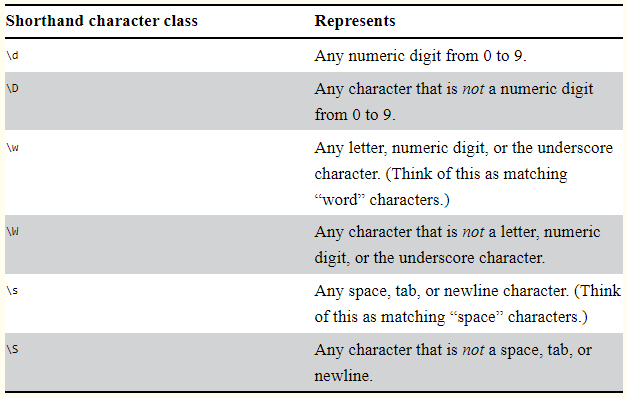

Character classes are nice for shortening regular expressions. The character class [0-5] will match only the numbers 0 to 5; this is much shorter than typing (0|1|2|3|4|5). Note that while \d matches digits and \w matches digits, letters, and the underscore, **there is no shorthand character class that matches only letters.** (Though you can use the [a-zA-Z] character class, as explained next.)

In [139]:
xmasRegex = re.compile(r'\d+\s\w+')
xmasRegex.findall('12 drummers, 11 pipers, 10 lords, 9 ladies, 8 maids, 7swans, 6 geese, 5 rings, 4 birds, 3 hens, 2 doves, 1 partridge')



['12 drummers',
 '11 pipers',
 '10 lords',
 '9 ladies',
 '8 maids',
 '6 geese',
 '5 rings',
 '4 birds',
 '3 hens',
 '2 doves',
 '1 partridge']

In [144]:
xmasRegex = re.compile(r'(\d+)\s(\w+)')
mo = xmasRegex.findall('12 drummers, 11 pipers, 10 lords, 9 ladies, 8 maids, 7swans, 6 geese, 5 rings, 4 birds, 3 hens, 2 doves, 1 partridge')
mo


[('12', 'drummers'),
 ('11', 'pipers'),
 ('10', 'lords'),
 ('9', 'ladies'),
 ('8', 'maids'),
 ('6', 'geese'),
 ('5', 'rings'),
 ('4', 'birds'),
 ('3', 'hens'),
 ('2', 'doves'),
 ('1', 'partridge')]

### Making Your Own Character Classes

There are times when you want to match a set of characters but the shorthand character classes (\d, \w, \s, and so on) are too broad. **You can define your own character class using square brackets.**

For example, the character class [aeiouAEIOU] will match any vowel, both lowercase and uppercase.

In [145]:
vowelRegex = re.compile(r'[aeiouAEIOU]')
vowelRegex.findall('RoboCop eats baby food. BABY FOOD.')

['o', 'o', 'o', 'e', 'a', 'a', 'o', 'o', 'A', 'O', 'O']

* You can also include **ranges of letters or numbers by using a hyphen**. For example, the character class [a-zA-Z0-9] will match all lowercase letters, uppercase letters, and numbers.  

* NOTE THAT inside the square brackets, the normal regular expression symbols are not interpreted as such. This means you DO NOT NEED to escape the ., *, ?, or () characters with a preceding backslash. For example, the character class [0-5.] will match digits 0 to 5 and a period. You do not need to write it as [0-5\.].

* By placing a **caret character (^)** **just after the character class’s opening bracket,** you can make a negative character class. A negative character class will match all the characters that are not in the character class.

In [148]:
NOvowelRegex = re.compile(r'[^aeiouAEIOU]') 
# Now, instead of matching every vowel, we’re matching every character that isn’t a vowel.
NOvowelRegex.findall('RoboCop eats baby food. BABY FOOD.')

['R',
 'b',
 'C',
 'p',
 ' ',
 't',
 's',
 ' ',
 'b',
 'b',
 'y',
 ' ',
 'f',
 'd',
 '.',
 ' ',
 'B',
 'B',
 'Y',
 ' ',
 'F',
 'D',
 '.']

### The Caret and Dollar Sign Characters
* **caret symbol (^)** at the start of a regex to indicate that a match **must occur at the beginning of the searched text**
* **dollar sign ($)** at the end of the regex to indicate the **string must end with this regex pattern.** 
* And you can use the **^ and $ together** to indicate that the entire string must match the regex—that is, it’s not enough for a match to be made on some subset of the string.

In [157]:
beginsWithHello = re.compile(r'^Hello')
mo = beginsWithHello.search('Hello, world!')
mo.group()

'Hello'

The r'\d$' regular expression string matches strings that end with a numeric character from 0 to 9. 

In [159]:
endsWithNumber = re.compile(r'\d$')
mo = endsWithNumber.search('Your number is 42')
mo.group()

'2'

In [160]:
endsWithNumber = re.compile(r'\d+$')
mo = endsWithNumber.search('Your number is 42')
mo.group()

'42'

The r'^\d+$' regular expression string matches strings that both begin and end with one or more numeric characters. 

In [161]:
wholeStringIsNum = re.compile(r'^\d+$')
mo = wholeStringIsNum.search('1234567890')
mo.group()

'1234567890'

In [163]:
wholeStringIsNum = re.compile(r'^\d+$')
mo = wholeStringIsNum.search('1234567890')
mo.group()

'1234567890'

In [164]:
wholeStringIsNum = re.compile(r'^\d+$')
wholeStringIsNum.search('12345xyz67890') == None

True

In [165]:
wholeStringIsNum = re.compile(r'^\d+$')
wholeStringIsNum.search('12345 67890') == None

True

The last two search() calls in the previous interactive shell example demonstrate how **the entire string must match the regex if ^ and $ are used**.

### The Wildcard Character
The **. (or dot) character** in a regular expression is called a wildcard and **will match any character except for a newline.**

In [167]:
atRegex = re.compile(r'.at')
atRegex.findall('The cat in the hat sat on the flat mat.')

['cat', 'hat', 'sat', 'lat', 'mat']

**Remember that the dot character will match just one character,** which is why the match for the text flat in the previous example matched only lat. To match an actual dot, escape the dot with a backslash: \..

In [169]:
atRegex = re.compile(r'.{,2}at')
atRegex.findall('The cat in the hat sat on the flat mat.')

[' cat', ' hat', ' sat', 'flat', ' mat']

### Matching Everything with Dot-Star

Sometimes you will want to match everything and anything. For example, say you want to match the string 'First Name:', followed by any and all text, followed by 'Last Name:', and then followed by anything again. You can use the dot-star (.*) to stand in for that “anything.” 
* **(.) dot character** means “any single character except the newline,” 
* **(*) star character** means “zero or more of the preceding character.

In [182]:
nameRegex = re.compile(r'First Name: (.*) Last Name: (.*)')
mo = nameRegex.search('First Name: Al Last Name: Sweigart')

In [183]:
mo.group(1)

'Al'

In [184]:
mo.group(2)

'Sweigart'

The dot-star uses greedy mode: It will always try to match as much text as possible. To match any and all text in a non-greedy fashion, use the dot, star, and question mark (.*?). Like with braces, the question mark tells Python to match in a non-greedy way.

In [185]:
nongreedyRegex = re.compile(r'<.*?>')
mo = nongreedyRegex.search('<To serve man> for dinner.>')
mo.group()

'<To serve man>'

In [187]:
greedyRegex = re.compile(r'<.*>')
mo = greedyRegex.search('<To serve man> for dinner.>')
mo.group()

'<To serve man> for dinner.>'

Both regexes roughly translate to “Match an opening angle bracket, followed by anything, followed by a closing angle bracket.” But the string '<To serve man> for dinner.>' has two possible matches for the closing angle bracket. 

* **In the non-greedy version** of the regex, Python matches the shortest possible string: '<To serve man>'.
* **In the greedy version**, Python matches the longest possible string: '<To serve man> for dinner.>'.

### Matching Newlines with the Dot Character
The dot-star will match everything except a newline. By passing **re.DOTALL as the second argument to re.compile()**, you can make the dot character match all characters, including the newline character.

In [188]:
noNewlineRegex = re.compile('.*')
mo = noNewlineRegex.search('Serve the public trust.\nProtect the innocent.\nUphold the law.')
mo.group()

'Serve the public trust.'

In [191]:
NewlineRegex = re.compile('.*',re.DOTALL)
mo = NewlineRegex.search('Serve the public trust.\nProtect the innocent.\nUphold the law.')
mo.group()

'Serve the public trust.\nProtect the innocent.\nUphold the law.'

*  noNewlineRegex, which **did not have** re.DOTALL passed to the re.compile() call that created it, will match everything only up to the first newline character
* newlineRegex, which **did have re.DOTALL** passed to re.compile(), matches everything. This is why the newlineRegex.
search() call matches the full string, including its newline characters.

## Case-Insensitive Matching

Normally, regular expressions match text with the exact casing you specify. For example, the following regexes match completely different strings:

In [192]:
regex1 = re.compile('RoboCop')
regex2 = re.compile('ROBOCOP')
regex3 = re.compile('robOcop')
regex4 = re.compile('RobocOp')

But sometimes you care only about matching the letters without worrying whether they’re uppercase or lowercase.  
**To make your regex case-insensitive**, you can pass **re.IGNORECASE** or **re.I** as a second argument to re.compile().

In [195]:
robocop = re.compile(r'robocop')
mo = robocop.search('RoboCop is part man, part machine, all cop.')
mo == None # gives true meaning that no match has been found 

True

now that we modify it to be case-insensitive we can see that is finds a match with Robocop

In [199]:
robocop = re.compile(r'robocop', re.I)
mo = robocop.search('RoboCop is part man, part machine, all cop.')
mo.group()

'RoboCop'

## Substituting Strings with the sub() Method

Regular expressions can not only find text patterns but can also substitute new text in place of those patterns.  
**The sub() method** for Regex objects is passed two arguments. 
* The first argument is a string to replace any matches
* The second is the string for the regular expression. 

**The sub() method returns a string with the substitutions applied.**

In [200]:
namesRegex = re.compile(r'Agent \w+')
namesRegex.sub('CENSORED', 'Agent Alice gave the secret documents to Agent Bob.')

'CENSORED gave the secret documents to CENSORED.'

ometimes you may need to use the matched text itself as part of the substitution. In the first argument to sub(), you can type \1, \2, \3, and so on, to mean **“Enter the text of group 1, 2, 3, and so on, in the substitution.”**

*FOR EXAMPLE say you want to censor the names of the secret agents by showing just the first letters of their names. To do this, you could use the regex Agent (\w)\w* and pass r'\1****' as the first argument to sub(). The \1 in that string will be replaced by whatever text was matched by group 1—that is, the (\w) group of the regular expression.*

In [210]:
namesRegex = re.compile(r'Agent (\w)\w+')
namesRegex.sub(r'Agent \1**', '''Agent Alice told Agent Carol that Agent Eve knew Agent Bob was a double agent.''')

'Agent A** told Agent C** that Agent E** knew Agent B** was a double agent.'

## Managing Complex Regexes

Regular expressions are fine if the text pattern you need to match is simple. 
**But matching complicated text patterns might require long, convoluted regular expressions.** You can mitigate this by telling the re.compile() function to ignore whitespace and comments inside the regular expression string.

**This “verbose mode”** can be enabled by passing the variable **re.VERBOSE** as the second argument to re.compile().



In [ ]:
# Now instead of a hard-to-read regular expression like this:

phoneRegex = re.compile(r'((\d{3}|\(\d{3}\))?(\s|-|\.)?\d{3}(\s|-|\.)\d{4}(\s*(ext|x|ext.)\s*\d{2,5})?)')

#you can spread the regular expression over multiple lines with comments like this:
# still we had to use the "'''" triple quotes string to spread the regular expression through multiple lines

phoneRegex = re.compile(r'''(
    (\d{3}|\(\d{3}\))?            # area code
    (\s|-|\.)?                    # separator
    \d{3}                         # first 3 digits
    (\s|-|\.)                     # separator
    \d{4}                         # last 4 digits
    (\s*(ext|x|ext.)\s*\d{2,5})?  # extension
    )'''
    
    , re.VERBOSE)


he comment rules inside the regular expression string are the same as regular Python code: the # symbol and everything after it to the end of the line are ignored. Also, the extra spaces inside the multiline string for the regular expression are not considered part of the text pattern to be matched. This lets you organize the regular expression so it’s easier to read.

## Combining re.IGNORECASE, re.DOTALL, and re.VERBOSE

What if you want to use re.VERBOSE to write comments in your regular expression but also want to use re.IGNORECASE to ignore capitalization? Unfortunately, the re.compile() function takes only a single value as its second argument. You can get around this limitation by combining the re.IGNORECASE, re.DOTALL, and re.VERBOSE variables using the pipe character (|), which in this context is known as the bitwise or operator

In [211]:
#So if you want a regular expression that’s case-insensitive and includes newlines to match the dot character,
# you would form your re.compile() call like this:

someRegexValue = re.compile('foo', re.IGNORECASE | re.DOTALL)

In [212]:
# Including all three options in the second argument will look like this:

someRegexValue = re.compile('foo', re.IGNORECASE | re.DOTALL | re.VERBOSE)

## Capturing And non-Capturing Groups

* **capturing groups** are used to extract specific parts of a matched string.  
Capturing groups are denoted by **parentheses ()** in the regex pattern. Any text that matches the pattern within the parentheses is captured and **can be referenced later using backreferences.**
* **non-capturing groups** are used to group parts of a regex pattern together without capturing them.  
Non-capturing groups are denoted by **(?:)** in the regex pattern. Any text that matches the pattern within the non-capturing group is not captured and **cannot be referenced later.** 

In [223]:
# Here all the goups are capturing groups as we have () everywhere and in fact
# we have extracted 3 groups and in the if statement we are using all 3 groups 

text = "My phone number is (123) 456-7890"
pattern = r"\((\d{3})\)\s*(\d{3})-(\d{4})"
match = re.search(pattern, text)

if match:
    area_code = match.group(1)
    phone_number = match.group(2) + '-' + match.group(3)
    print(f"My phone number is {area_code}-{phone_number}")

match.group()

My phone number is 123-456-7890


'(123) 456-7890'

In [227]:
import re

text = "My phone number is (123) 456-7890"
pattern = r"\((\d{3})\)\s*(\d{3})-(?:\d{4})"
match = re.search(pattern, text)

match.group()

'(123) 456-7890'

In [228]:
match.group(1)

'123'

In [229]:
match.group(2)

'456'

In [230]:
# Group 3 is used just to regex purposes but is not captured that's why when we try to retrive it we get an ERROR "no such group"
match.group(3)

IndexError: no such group

# Project: Phone Number and Email Address Extractor
Big Picture 
* Get the text off the clipboard.
* Find all phone numbers and email addresses in the text.
* Paste them onto the clipboard.

Now you can start thinking about how this might work in code. The code will need to do the following:

* Use the pyperclip module to copy and paste strings.
* Create two regexes, one for matching phone numbers and the other for matching email addresses.
* Find all matches, not just the first match, of both regexes.
* Neatly format the matched strings into a single string to paste.
* Display some kind of message if no matches were found in the text.



In [218]:
import pyperclip as pyp
import re

In [431]:
phoneRegex = re.compile(r'''(
#(\+\d{1,3}|0{2}\d{1,3}(\s|\.|-|))?    # He we catch the international prefix
(\d{3}|\(\d{3}\))                    # He we catch the first 3 digits 
(\s|\.|-|)                            # Separator is here
(\d{3})                               # He we catch the second 3 digits 
(\s|\.|-|)                            # Separator is here
(\d{4})                               # He we catch the last 4 digits 
(\s*(ext|x|ext.)\s*(\d{2,5}))?        # Extension is captured here 
)''', re.VERBOSE)

In [432]:
emailRegex = re.compile(r'''
(                
\b([\w.-]+)               #the addres
@                   
([\w\.-]+)               # the first extension of the email
\.
(\w{2,3})\b         # the .com part that can be different 
\.?
(\w{2,3})?         # the .com part that can be different 
)
''', re.VERBOSE | re.IGNORECASE)

In [438]:
text = str(pyp.paste())

In [439]:
text

'Main menu\r\n\r\nWikipediaThe Free Encyclopedia\r\nSearch\r\nCreate account\r\nLog in\r\n\r\nPersonal tools\r\nToggle the table of contents\r\nEmail address\r\n\r\nArticle\r\nTalk\r\nRead\r\nEdit\r\nView history\r\n\r\nTools\r\nFrom Wikipedia, the free encyclopedia\r\nAn email address identifies an email box to which messages are delivered. While early messaging systems used a variety of formats for addressing, today, email addresses follow a set of specific rules originally standardized by the Internet Engineering Task Force (IETF) in the 1980s, and updated by RFC 5322 and 6854. The term email address in this article refers to just the addr-spec in Section 3.4 of RFC 5322. The RFC defines address more broadly as either a mailbox or group. A mailbox value can be either a name-addr, which contains a display-name and addr-spec, or the more common addr-spec alone.\r\n\r\nAn email address, such as john.smith@example.com, is made up from a local-part, the symbol @, and a domain, which must

In [440]:
matches = []

In [441]:
for group in phoneRegex.findall(text):
    phone = '-'.join([group[1],group[3],group[5]])
    if group[8] != '':
        phone = phone + ' x' + group[8]
    matches.append(phone)

for groups in emailRegex.findall(text):
       matches.append(groups[0])


In [442]:
matches

['123-456-7890',
 '123-456-7890',
 '123-456-7890',
 '123-456-7890',
 '123-456-7890',
 '123-456-7890',
 'john.smith@example.com',
 'jsmith@example.com.',
 'john.smith@example.org',
 'John..Doe@example.com',
 'john.smith@example.com',
 'john.smith@example.com.',
 'jsmith@example.com',
 'JSmith@example.com',
 'john.smith@example.com',
 'john.smith@example.com.',
 'simple@example.com',
 'very.common@example.com',
 'symbol@example.com',
 'other.email-with-hyphen@and.subdomains.example.com',
 'fully-qualified-domain@example.com',
 'sorting@example.com',
 'user.name@example.com',
 'x@example.com',
 'example-indeed@strange-example.com',
 'test@test.com',
 'username@example.org',
 'example.com@example.org',
 'user@example.com',
 'user-@example.org',
 'c@example.com',
 'l@example.com',
 'right@example.com',
 'allowed@example.com',
 'allowed@example.com',
 'x@example.com',
 'i_like_underscore@but_its_not_allowed_in_this_part.example.com',
 'tag@example.com',
 'joeuser@example.com.',
 'bar@example